In [766]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import yfinance as yf
import math

#Download Stock Function

In [767]:
def download_stock(tickers, start_date, end_date) :
    df = yf.download(tickers= tickers, start= start_date, end= end_date)
    print(df.head())
    df.plot(y='Close', use_index= True)
    plt.title(f"Stock Price of {tickers}")
    plt.show()
    return df

[*********************100%***********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904640   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937271   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


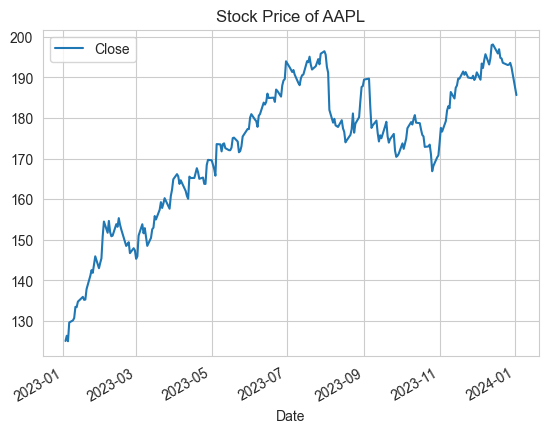

In [779]:
df = download_stock('AAPL', '2023-01-03', '2024-01-03')

#Calculate Log Return Function

In [769]:
def calculate_log_return(tickers, start_date, end_date):
        df = download_stock(tickers, start_date, end_date)
        log_return = np.log(1 + df['Close'].pct_change()).dropna()
        print(log_return)
        sns.lineplot(data=log_return)
        plt.title(f"Log Return of {tickers}")
        plt.show()
        return log_return

[*********************100%***********************]  1 of 1 completed


               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2015-01-02  0.50325  0.50700  0.49525  0.50325   0.483177  113680000
2015-01-05  0.50325  0.50475  0.49250  0.49475   0.475016  197952000
2015-01-06  0.49550  0.49600  0.47925  0.47975   0.460614  197764000
2015-01-07  0.48325  0.48750  0.47700  0.47850   0.459414  321808000
2015-01-08  0.48400  0.49950  0.48375  0.49650   0.476696  283780000


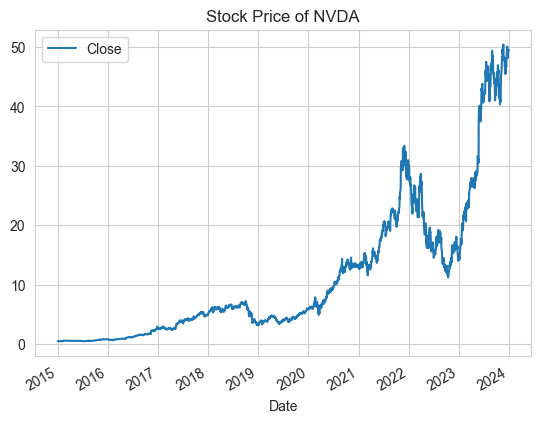

Date
2015-01-05   -0.017034
2015-01-06   -0.030787
2015-01-07   -0.002609
2015-01-08    0.036927
2015-01-09    0.004020
                ...   
2023-12-22   -0.003271
2023-12-26    0.009153
2023-12-27    0.002796
2023-12-28    0.002123
2023-12-29    0.000000
Name: Close, Length: 2263, dtype: float64


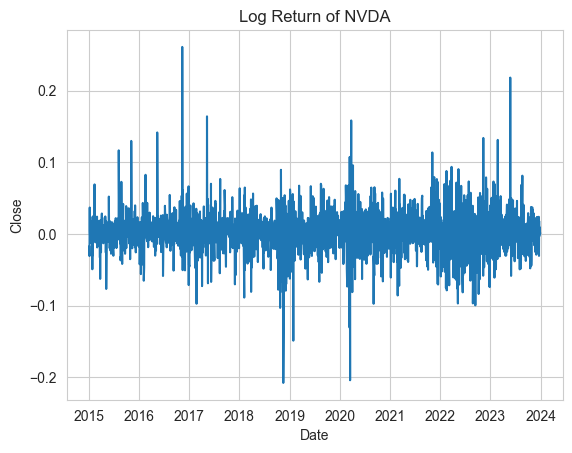

In [770]:
log_return = calculate_log_return('NVDA', '2015-01-01', '2024-01-01')

#Monte Carlo Function

In [771]:
def MonteCarlo(S0,mu,sigma,n):
    dt=1/n
    rt=np.random.normal((mu-sigma**2/2)*dt,(sigma*dt**0.5),n)
    W=np.cumsum(rt)
    St= S0 *np.exp(W)
    return St

#MC w/ Random Volality & Mu

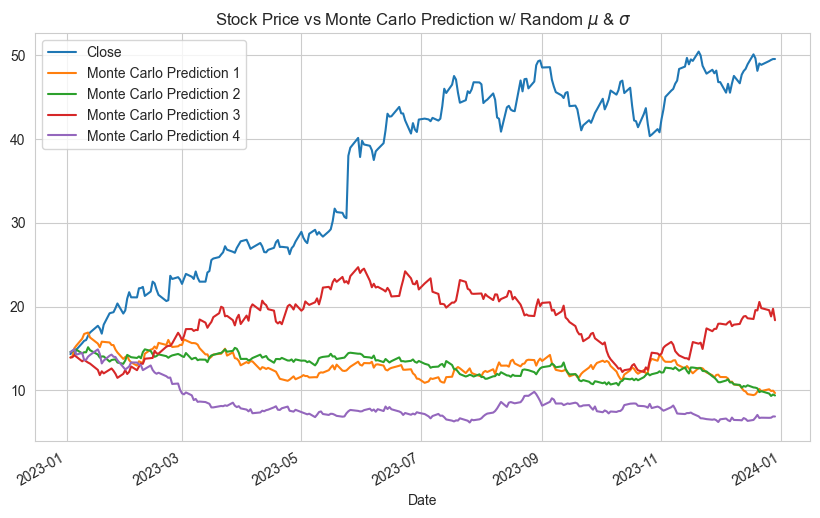

In [772]:
x = pd.date_range(start='2023-01-03', end='2024-01-01', freq='B')  
S0 = df.loc[x[0], 'Close']
MC_list = []


for i in range(1, 5):
    mu = np.random.uniform(0.005, 0.06)  # Rendement aléatoire entre 0.5% et 6%   
    sigma = np.random.uniform(0.3, 0.6)  # Volatilité aléatoire entre 30% et 60%
    MC = MonteCarlo(S0, mu, sigma, len(x))
    MC_list.append(MC)

for i in range(len(MC_list)):
    MC_df = pd.DataFrame(data=MC_list[i], index=x, columns=[f'Monte Carlo Prediction {i+1}'])
    df[f'Monte Carlo Prediction {i+1}'] = MC_df[f'Monte Carlo Prediction {i+1}']


if len(x) < len(df['Close']):
    MC_df = df.loc[df.index.isin(x)].copy()  
    MC_df[['Close'] + [f'Monte Carlo Prediction {i+1}' for i in range(len(MC_list))]].plot(figsize=(10, 6))
    plt.title(f'Stock Price vs Monte Carlo Prediction w/ Random $\\mu$ & $\\sigma$ ')
    plt.show()
else:
    df[['Close'] + [f'Monte Carlo Prediction {i+1}' for i in range(len(MC_list))]].plot(figsize=(10, 6))
    plt.title(f'Stock Price vs Monte Carlo Prediction w/ Random $\\mu$ & $\\sigma$ ')
    plt.show()


#MC With Historical Volality & Mu

In [773]:
histmu = np.mean(log_return)
print(f'historical mu : {mu:f}')

histvol= np.std(log_return) * np.sqrt(252)
print(f'historical vol : {histvol:f}')

historical mu : 0.008097
historical vol : 0.477649


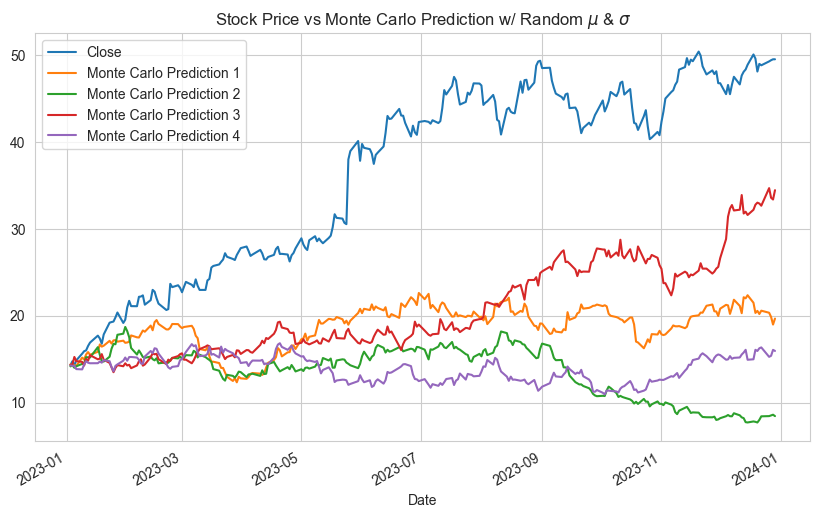

In [774]:
x = pd.date_range(start='2023-01-03', end='2024-01-01', freq='B')  
S0 = df.loc[x[0], 'Close']
MC_list = []

for i in range(1,5):
    mu = histmu    
    sigma = histvol   
    MC = MonteCarlo(S0, mu, sigma, len(x))
    MC_list.append(MC)
    
for i in range(len(MC_list)):
    MC_df = pd.DataFrame(data=MC_list[i], index=x, columns=[f'Monte Carlo Prediction {i+1}'])
    df[f'Monte Carlo Prediction {i+1}'] = MC_df[f'Monte Carlo Prediction {i+1}']

if len(x) < len(df['Close']):
    MC_df = df.loc[df.index.isin(x)].copy()  
    MC_df[['Close'] + [f'Monte Carlo Prediction {i+1}' for i in range(len(MC_list))]].plot(figsize=(10, 6))
    plt.title(f'Stock Price vs Monte Carlo Prediction w/ Random $\\mu$ & $\\sigma$ ')
    plt.show()
else:
    df[['Close'] + [f'Monte Carlo Prediction {i+1}' for i in range(len(MC_list))]].plot(figsize=(10, 6))
    plt.title(f'Stock Price vs Monte Carlo Prediction w/ Random $\\mu$ & $\\sigma$ ')
    plt.show()

# Final Program

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

class Stock:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.data = None
        self.log_return = None

    def download_stock(self):
        self.data = yf.download(tickers=self.ticker, start=self.start_date, end=self.end_date)
        print(self.data.head())
        self.data.plot(y='Close', use_index=True)
        plt.title(f"Stock Price of {self.ticker}")
        plt.show()
        return self.data
    
    def calculate_log_return(self):
        df = self.download_stock()
        self.log_return = np.log(1 + df['Close'].pct_change()).dropna()
        print(self.log_return)
        sns.lineplot(data=self.log_return)
        plt.title(f"Log Return of {self.ticker}")
        plt.show()
        return self.log_return

    def MonteCarlo(self, S0, mu, sigma, n):
        dt = 1 / n
        rt = np.random.normal((mu - sigma**2 / 2) * dt, sigma * np.sqrt(dt), n)
        W = np.cumsum(rt)
        St = S0 * np.exp(W)
        return St
    
    def calculate_historical_mu_and_vol(self):
        if self.log_return is None:
            self.log_return = self.calculate_log_return()
        self.hist_mu = np.mean(self.log_return)
        self.hist_vol = np.std(self.log_return) * np.sqrt(252) 
        print(f"Historical Mu: {self.hist_mu:4f}, Historical Volatility: {self.hist_vol:4f}")
    
    def plot_monte_carlo(self, start_MC, end_MC, num_simulation, historical=False):
        x = pd.date_range(start=start_MC, end=end_MC, freq='B')
        n = len(x)
        S0 = self.data.loc[x[0], 'Close'] 

        MC_list = []

        if historical:
            mu = self.hist_mu
            sigma = self.hist_vol
            column_prefix = "Monte Carlo Simulation "
        else:
            mu = np.random.uniform(0.005, 0.06) 
            sigma = np.random.uniform(0.3, 0.6)
            column_prefix = "Monte Carlo Simulation Random "

        for _ in range(num_simulation):  
            MC = self.MonteCarlo(S0, mu, sigma, n)
            MC_list.append(MC)
        
        MC_df = pd.DataFrame(data=np.array(MC_list).T, index=x, columns=[f'{column_prefix}{j+1}' for j in range(num_simulation)])
        
        self.data = self.data.join(MC_df, how='left') # Ajouter les valeurs de MC_df appartenant aux indices de self.data
        plot_columns = ['Close'] + [f'{column_prefix}{i+1}' for i in range(num_simulation)]

        if n < len(self.data['Close']):
            MC_df = self.data.loc[self.data.index.isin(x)].copy()
            MC_df[plot_columns].plot(figsize=(10, 6), legend=(num_simulation <= 5))
        else: 
            self.data[plot_columns].plot(figsize=(10, 6), legend=(num_simulation <= 5))
        
        if historical:
            title = f'Stock Price vs Monte Carlo Predictions w/ Historical $\\mu$={mu:.4f} & $\\sigma$={sigma:.4f} for {self.ticker}'
        else:
            title = f'Stock Price vs Monte Carlo Predictions w/ Random $\\mu$={mu:.4f} & $\\sigma$={sigma:.4f} for {self.ticker}'
        
        plt.title(title)
        plt.show()

[*********************100%***********************]  1 of 1 completed


               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2015-01-02  0.50325  0.50700  0.49525  0.50325   0.483177  113680000
2015-01-05  0.50325  0.50475  0.49250  0.49475   0.475016  197952000
2015-01-06  0.49550  0.49600  0.47925  0.47975   0.460614  197764000
2015-01-07  0.48325  0.48750  0.47700  0.47850   0.459414  321808000
2015-01-08  0.48400  0.49950  0.48375  0.49650   0.476696  283780000


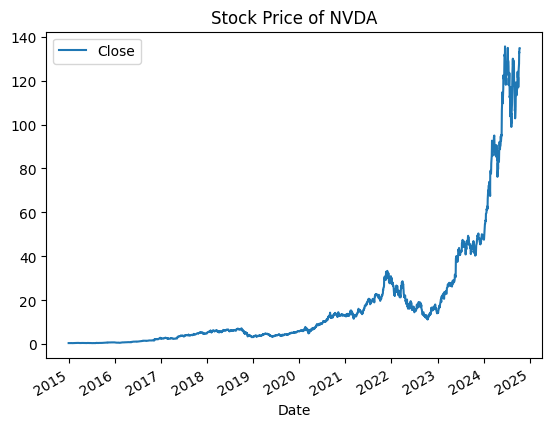

Date
2015-01-05   -0.017034
2015-01-06   -0.030787
2015-01-07   -0.002609
2015-01-08    0.036927
2015-01-09    0.004020
                ...   
2024-10-07    0.022167
2024-10-08    0.039681
2024-10-09   -0.001808
2024-10-10    0.016152
2024-10-11   -0.000074
Name: Close, Length: 2460, dtype: float64


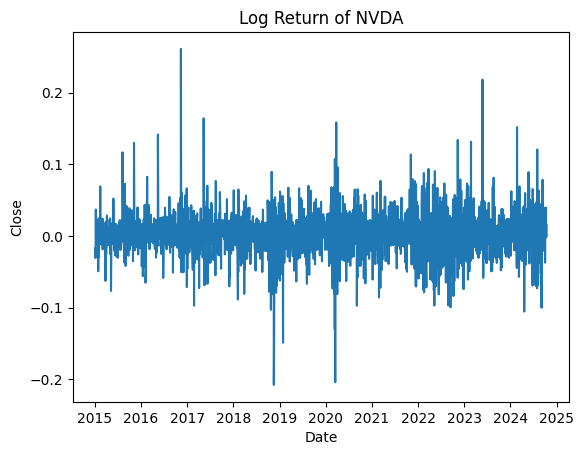

Historical Mu: 0.002273, Historical Volatility: 0.484349


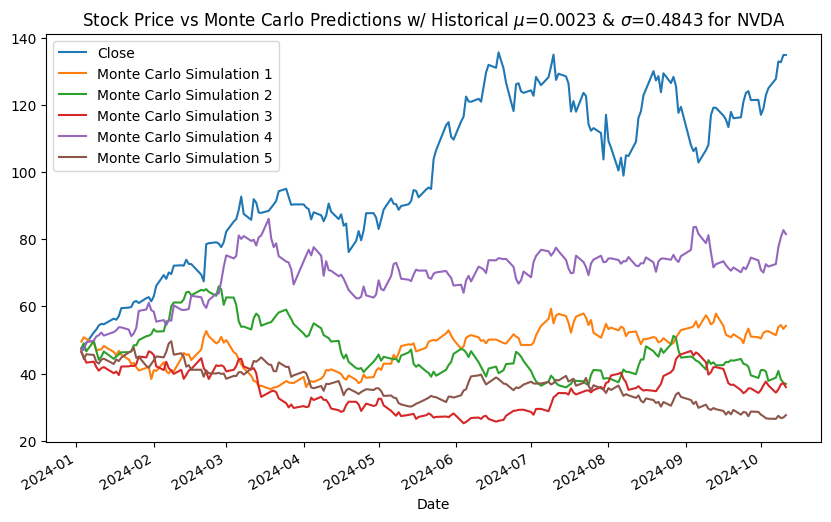

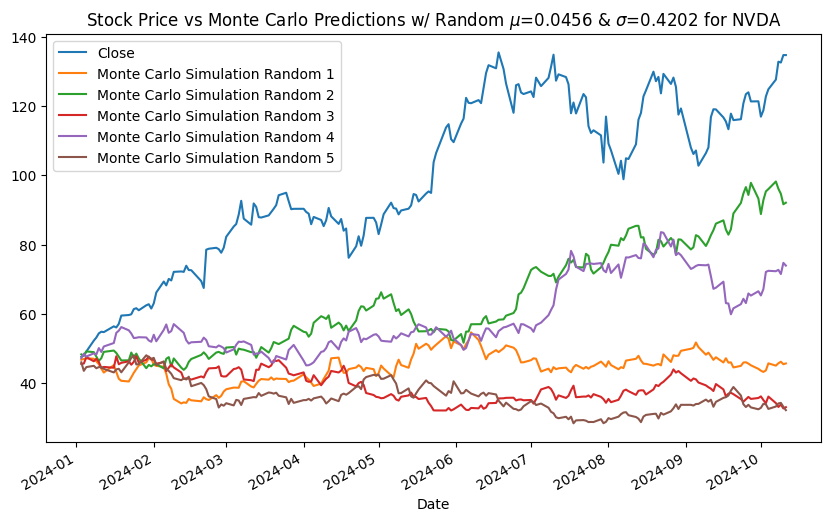

In [29]:
if __name__ == "__main__":
    stock = Stock('NVDA', '2015-01-01', '2024-10-12')
    stock.calculate_log_return()
    stock.calculate_historical_mu_and_vol() 
    stock.plot_monte_carlo('2024-01-03','2024-10-14', num_simulation=5, historical=True)
    stock.plot_monte_carlo('2024-01-03','2024-10-14', num_simulation=5, historical=False)